In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install datasets==3.6.0

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import random
from enum import Enum
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

###EDA

In [4]:
fever_ds = load_dataset("rickpereira/FEVER")
squad_ds = load_dataset("squad")

README.md:   0%|          | 0.00/657 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/13.5M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/3.39M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/211057 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/52765 [00:00<?, ? examples/s]

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [5]:
fever_ds_pd = fever_ds['train'].to_pandas()
squad_ds_pd = squad_ds['train'].to_pandas()

In [6]:
fever_ds_pd

,id,label,claim,evidence_annotation_id,evidence_id,evidence_wiki_url,evidence_sentence_id
0,1118,SUPPORTS,Rafael Nadal is an athlete.,16716,20715,Rafael_Nadal,-1
1,165735,SUPPORTS,License to Wed was directed by a director.,300908,292001,Ken_Kwapis,-1
2,184555,SUPPORTS,The Shadow Line was written by a man who was E...,214993,221940,Hugo_Blick,-1
3,100297,SUPPORTS,The Bourne Supremacy is a movie.,117960,131835,The_Bourne_Supremacy_-LRB-film-RRB-,11
4,103783,REFUTES,Man of Steel began principal photography in 1980.,327433,314676,Man_of_Steel_-LRB-film-RRB-,13
...,...,...,...,...,...,...,...
211052,1257,SUPPORTS,Bob Dylan was born in 1941.,16875,20890,Bob_Dylan,-1
211053,99768,REFUTES,The capital of Fiji is Tokyo.,118731,132573,Fiji,7
211054,154878,REFUTES,Texas has no theme parks.,178941,191487,Six_Flags,2
211055,42935,REFUTES,Pornhub is a G-rated website.,128647,143300,Pornhub,-1


In [7]:
squad_ds_pd

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...
...,...,...,...,...,...
87594,5735d259012e2f140011a09d,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,"{'text': ['Oregon'], 'answer_start': [229]}"
87595,5735d259012e2f140011a09e,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,"{'text': ['Rangoon'], 'answer_start': [414]}"
87596,5735d259012e2f140011a09f,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,"{'text': ['Minsk'], 'answer_start': [476]}"
87597,5735d259012e2f140011a0a0,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,"{'text': ['1975'], 'answer_start': [199]}"


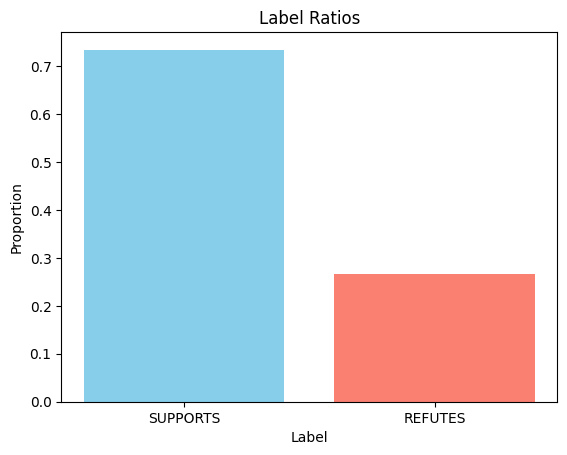

In [8]:
## Ratio of claims supported by evidence and claims refuted by evidence in FEVER dataset.
label_ratios = fever_ds_pd['label'].value_counts(normalize=True)
plt.bar(label_ratios.index, label_ratios.values, color=['skyblue', 'salmon'])
plt.xlabel('Label')
plt.ylabel('Proportion')
plt.title('Label Ratios')
plt.show()

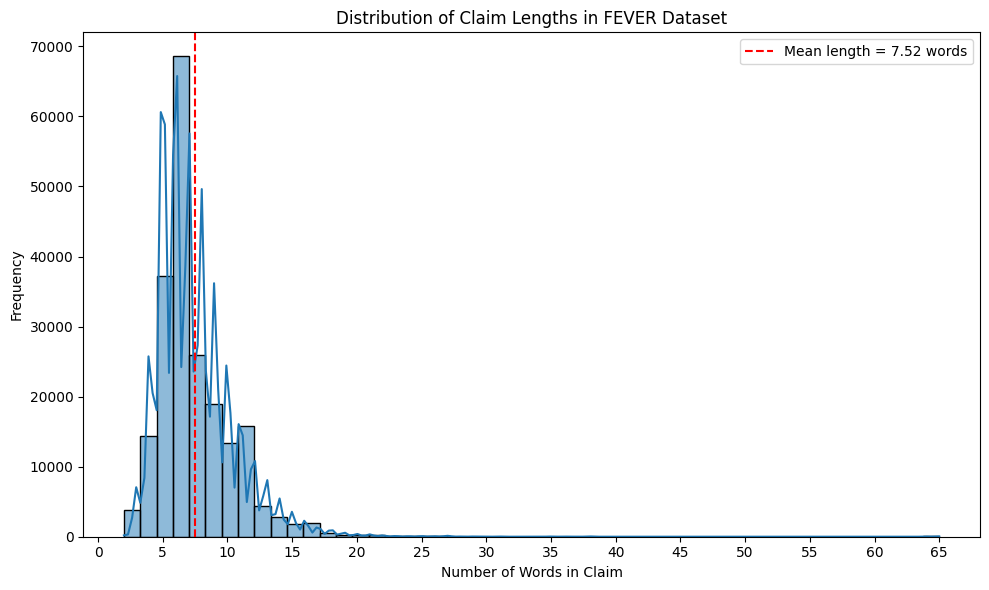

In [9]:
## Claim length distribution in FEVER dataset
fever_ds_pd['claim_length'] = fever_ds_pd['claim'].apply(lambda x: len(str(x).split()))

mean_len = fever_ds_pd['claim_length'].mean()
min_len = fever_ds_pd['claim_length'].min()
max_len = fever_ds_pd['claim_length'].max()

plt.figure(figsize=(10, 6))
sns.histplot(data=fever_ds_pd, x='claim_length', bins=50, kde=True)

plt.axvline(mean_len, color='red', linestyle='--')
plt.plot([], [], color='red', linestyle='--', label=f"Mean length = {mean_len:.2f} words")

plt.title("Distribution of Claim Lengths in FEVER Dataset")
plt.xlabel("Number of Words in Claim")
plt.ylabel("Frequency")

plt.xticks(np.arange(0, max_len + 5, 5))

plt.legend()
plt.tight_layout()
plt.show()


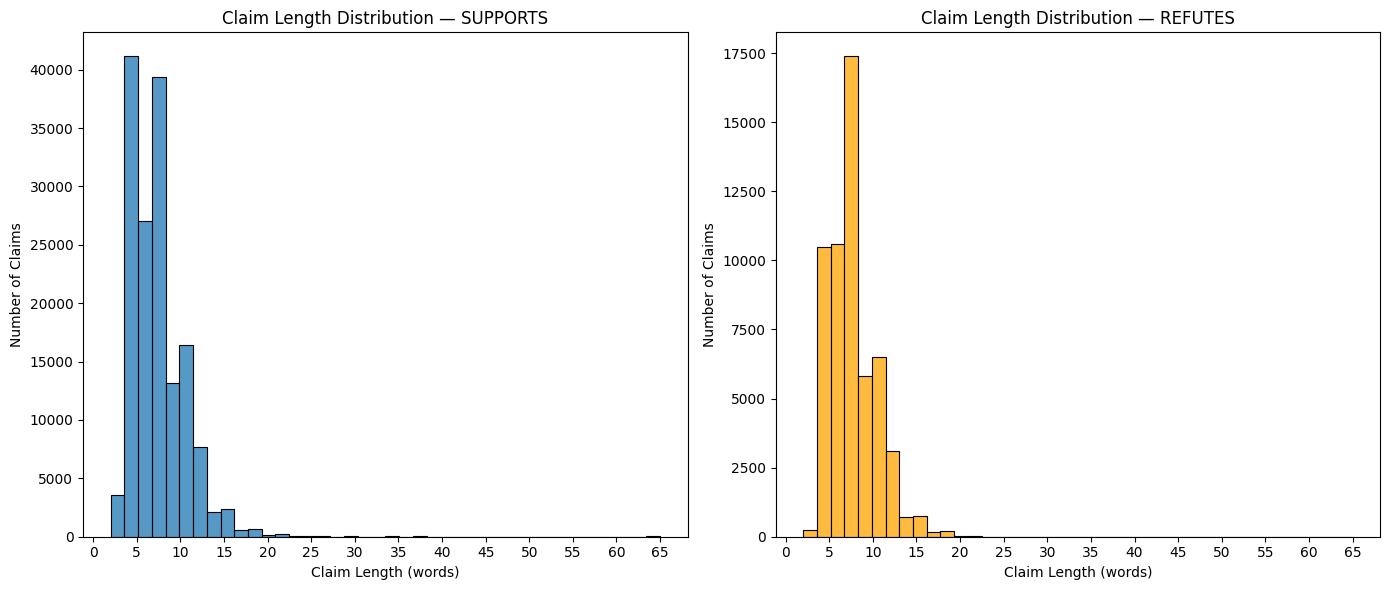

In [10]:
fever_ds_pd['claim_length'] = fever_ds_pd['claim'].apply(lambda x: len(str(x).split()))

# Split by label
df_supports = fever_ds_pd[fever_ds_pd['label'] == 'SUPPORTS']
df_refutes = fever_ds_pd[fever_ds_pd['label'] == 'REFUTES']

min_len = fever_ds_pd['claim_length'].min()
max_len = fever_ds_pd['claim_length'].max()
bins = np.linspace(min_len, max_len, 41)  # 40 bins

plt.figure(figsize=(14, 6))

# --- SUPPORTS ---
plt.subplot(1, 2, 1)
sns.histplot(data=df_supports, x='claim_length', bins=bins, kde=False)
plt.title("Claim Length Distribution — SUPPORTS")
plt.xlabel("Claim Length (words)")
plt.ylabel("Number of Claims")
plt.xticks(np.arange(0, max_len + 5, 5))

# --- REFUTES ---
plt.subplot(1, 2, 2)
sns.histplot(data=df_refutes, x='claim_length', bins=bins, kde=False, color='orange')
plt.title("Claim Length Distribution — REFUTES")
plt.xlabel("Claim Length (words)")
plt.ylabel("Number of Claims")
plt.xticks(np.arange(0, max_len + 5, 5))

plt.tight_layout()
plt.show()

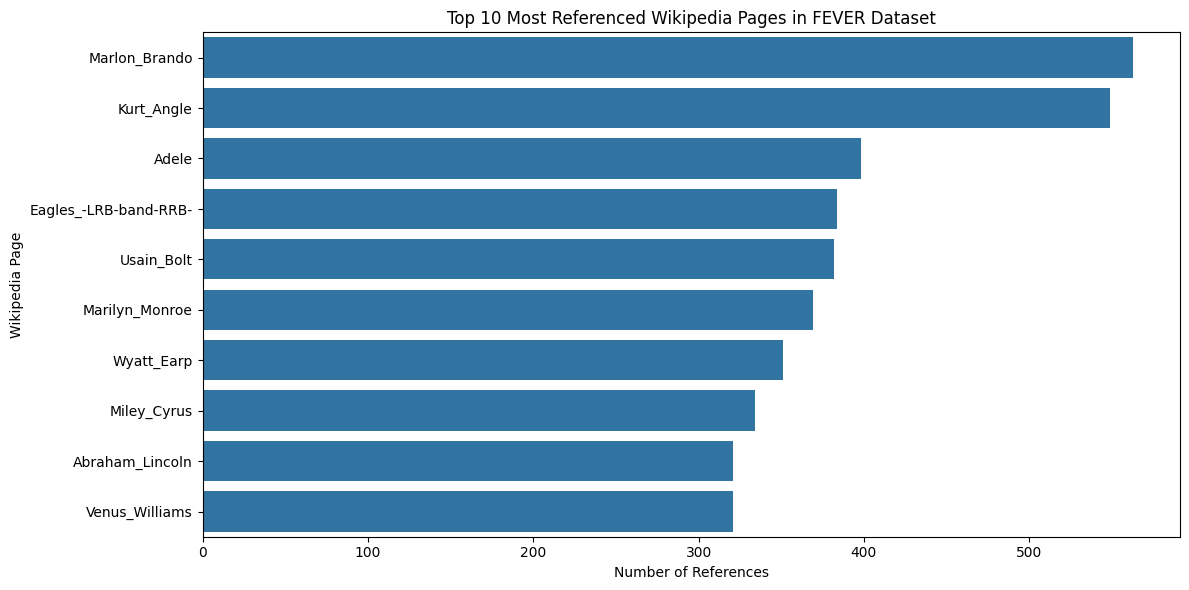

In [11]:
## Evidence Source Frequency (Top Wikipedia Pages)
## Top 10 Wikipedia pages referenced in the FEVER dataset.
TOP_N = 10

wiki_counts = (
    fever_ds_pd['evidence_wiki_url']
    .value_counts()
    .head(TOP_N)
    .reset_index()
)

wiki_counts.columns = ['wiki_page', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=wiki_counts, x='count', y='wiki_page')

plt.title(f"Top {TOP_N} Most Referenced Wikipedia Pages in FEVER Dataset")
plt.xlabel("Number of References")
plt.ylabel("Wikipedia Page")
plt.tight_layout()
plt.show()


In [12]:
fever_ds_pd['evidence_wiki_url'].value_counts().tail(10)

,count
evidence_wiki_url,
Harry_Potter_in_translation,1
John_Logan_-LRB-writer-RRB-,1
World_tag_team_championship,1
Federation_of_Bosnia_and_Herzegovina,1
Jaguar_Land_Rover,1
Dustin_Moskovitz,1
Eight_Legged_Freaks,1
Chuck_Daly_Lifetime_Achievement_Award,1
McLaren_young_driver_programme,1


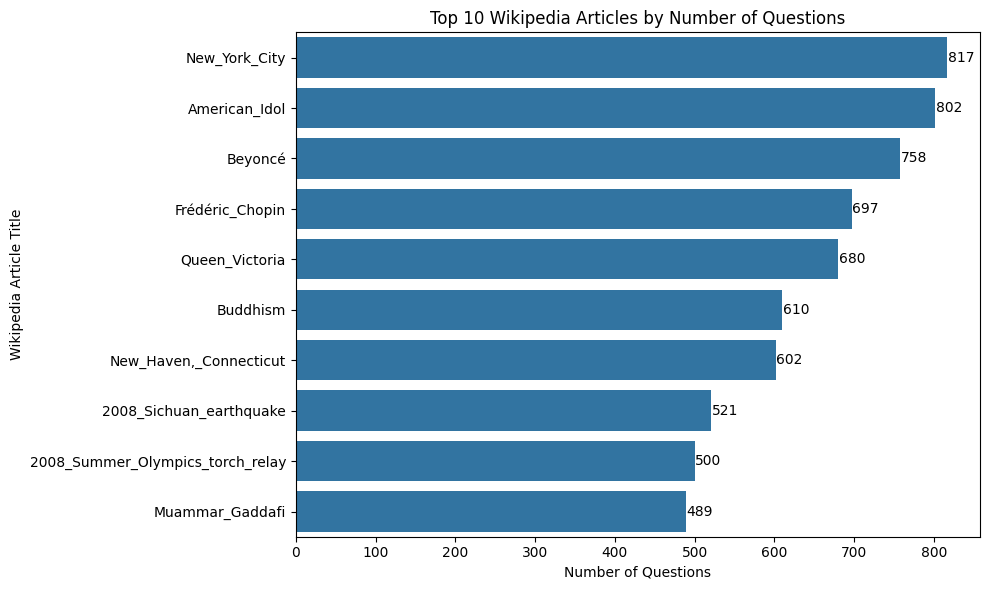

In [13]:
## SQuAD Dataset - number of questions per title (top 10)
TOP_N = 10

title_counts = squad_ds_pd['title'].value_counts().head(TOP_N).reset_index()
title_counts.columns = ['title', 'num_questions']

plt.figure(figsize=(10, 6))
sns.barplot(x='num_questions', y='title', data=title_counts)

plt.title(f"Top {TOP_N} Wikipedia Articles by Number of Questions")
plt.xlabel("Number of Questions")
plt.ylabel("Wikipedia Article Title")

for index, row in title_counts.iterrows():
    plt.text(row['num_questions'] + 0.5, index, row['num_questions'], va='center')

plt.tight_layout()
plt.show()

In [14]:
class EvaluationDatasetType(Enum):
  fever = "fever"
  boolq = "boolq"
  liar = "liar"

  def _load_dataset(self):
    if self == EvaluationDatasetType.fever:
      return load_dataset("rickpereira/FEVER")
    elif self == EvaluationDatasetType.boolq:
      return load_dataset("google/boolq")
    elif self == EvaluationDatasetType.liar:
      return load_dataset("rickpereira/liar")
    else:
      raise ValueError(f"Unknown dataset type: {self}")

  def _prepare_fever(self, dataset):
    TARGET_COLUMNS = ['label', 'claim']
    fever = dataset.select_columns(TARGET_COLUMNS)
    return fever

  def _prepare_boolq(self, dataset):
    TARGET_COLUMNS = ['question', 'answer']
    boolq = dataset.select_columns(TARGET_COLUMNS)
    boolq = boolq.rename_column('question', 'claim')
    boolq= boolq.rename_column('answer', 'label')
    return boolq

  def _prepare_liar(self, dataset):
    TARGET_COLUMNS = ['label', 'claim']
    dataset = dataset.filter(lambda x: x['label'] in ['true', 'false'])
    dataset = dataset.rename_column("statement", "claim")
    liar = dataset.select_columns(TARGET_COLUMNS)
    return liar

  def _prepare(self, dataset):
    if self == EvaluationDatasetType.fever:
      return self._prepare_fever(dataset)
    elif self == EvaluationDatasetType.boolq:
      return self._prepare_boolq(dataset)
    elif self == EvaluationDatasetType.liar:
      return self._prepare_liar(dataset)
    else:
      raise ValueError(f"Unknown dataset type: {self}")

  def load_and_prepare(self):
    dataset = self._load_dataset()
    return self._prepare(dataset)

In [15]:
boolq_datasets = EvaluationDatasetType.boolq.load_and_prepare()

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/3.69M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

In [16]:
boolq_datasets

DatasetDict({
    train: Dataset({
        features: ['claim', 'label'],
        num_rows: 9427
    })
    validation: Dataset({
        features: ['claim', 'label'],
        num_rows: 3270
    })
})

In [17]:
boolq_train_dataset = boolq_datasets['train'].to_pandas()

In [18]:
boolq_train_dataset

,claim,label
0,do iran and afghanistan speak the same language,True
1,do good samaritan laws protect those who help ...,True
2,is windows movie maker part of windows essentials,True
3,is confectionary sugar the same as powdered sugar,True
4,is elder scrolls online the same as skyrim,False
...,...,...
9422,is a us district court a federal court,True
9423,can a tenant get a restraining order against a...,True
9424,is the golden state warriors in the playoffs,True
9425,downton abbey will there be a season 7,False


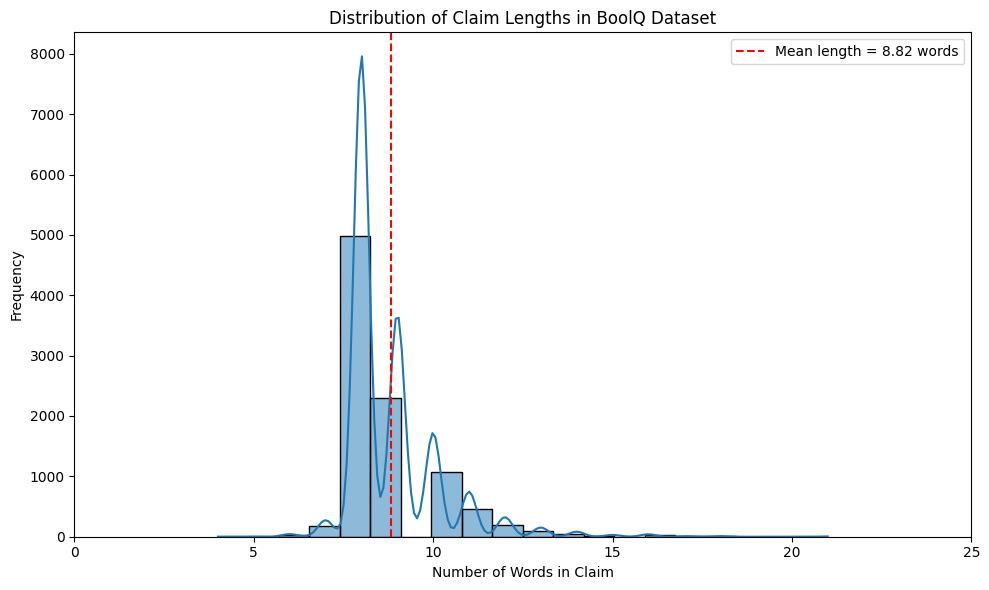

In [19]:
boolq_train_dataset['claim_length'] = boolq_train_dataset['claim'].apply(lambda x: len(str(x).split()))

mean_len = boolq_train_dataset['claim_length'].mean()
min_len = boolq_train_dataset['claim_length'].min()
max_len = boolq_train_dataset['claim_length'].max()

plt.figure(figsize=(10, 6))
sns.histplot(data=boolq_train_dataset, x='claim_length', bins=20, kde=True)

plt.axvline(mean_len, color='red', linestyle='--')
plt.plot([], [], color='red', linestyle='--', label=f"Mean length = {mean_len:.2f} words")

plt.title("Distribution of Claim Lengths in BoolQ Dataset")
plt.xlabel("Number of Words in Claim")
plt.ylabel("Frequency")

plt.xticks(np.arange(0, max_len + 5, 5))

plt.legend()
plt.tight_layout()
plt.show()

In [20]:
liar_datasets = EvaluationDatasetType.liar.load_and_prepare()

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/1.28M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/169k [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/168k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10240 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1267 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1284 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10240 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1267 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1284 [00:00<?, ? examples/s]

In [21]:
liar_datasets

DatasetDict({
    train: Dataset({
        features: ['label', 'claim'],
        num_rows: 3671
    })
    test: Dataset({
        features: ['label', 'claim'],
        num_rows: 457
    })
    validation: Dataset({
        features: ['label', 'claim'],
        num_rows: 432
    })
})

In [22]:
liar_train_dataset = liar_datasets['train'].to_pandas()

In [23]:
liar_train_dataset

,label,claim
0,false,Says the Annies List political group supports ...
1,false,Health care reform legislation is likely to ma...
2,true,The Chicago Bears have had more starting quart...
3,false,When Mitt Romney was governor of Massachusetts...
4,true,McCain opposed a requirement that the governme...
...,...,...
3666,false,There has been no net global warming for over ...
3667,false,This race will be the Democrats top target thi...
3668,false,"As a result of Obamacare, California seniors f..."
3669,true,"For the first time since the Korean War, total..."


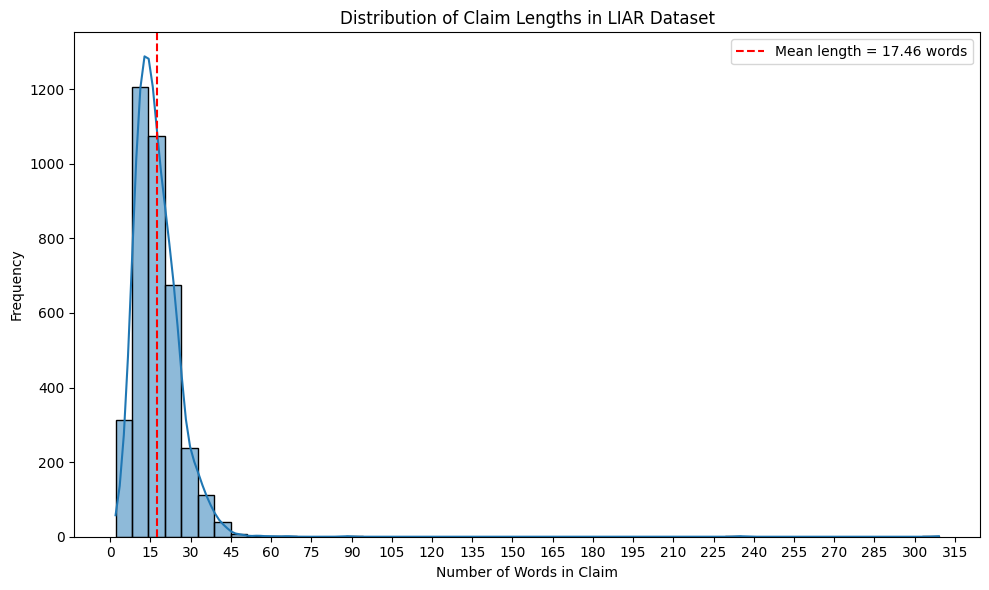

In [24]:
import matplotlib.ticker as ticker
liar_train_dataset['claim_length'] = liar_train_dataset['claim'].apply(lambda x: len(str(x).split()))

min_len = liar_train_dataset['claim_length'].min()
max_len = liar_train_dataset['claim_length'].max()
mean_len = liar_train_dataset['claim_length'].mean()

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=liar_train_dataset, x='claim_length', bins=50, kde=True)

plt.axvline(mean_len, color='red', linestyle='--')
plt.plot([], [], color='red', linestyle='--', label=f"Mean length = {mean_len:.2f} words")
plt.legend()

plt.title("Distribution of Claim Lengths in LIAR Dataset")
plt.xlabel("Number of Words in Claim")
plt.ylabel("Frequency")

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=30))

plt.tight_layout()
plt.show()